In [42]:
import zipfile

file = "/content/drive/MyDrive/global_energy/archive.zip"

zp = zipfile.ZipFile(file, "r")
zp.extractall("data")
zp.close()


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
df = pd.read_csv("/content/drive/MyDrive/global_energy/data/global-energy-substitution.csv", index_col=0)
df.to_csv("/content/drive/MyDrive/global_energy/data/global-energy-substitution.csv")
df.columns

Index(['Year', 'Other_renewables', 'Biofuels', 'Solar', 'Wind', 'Hydropower',
       'Nuclear', 'Gas', 'Oil', 'Coal', 'Traditional_biomass'],
      dtype='object')

In [45]:
renewable_columns = ['Solar', 'Wind', 'Hydropower', 'Biofuels', 'Traditional_biomass', 'Other_renewables']
non_renewable_columns = ['Coal', 'Gas', 'Nuclear', 'Oil']

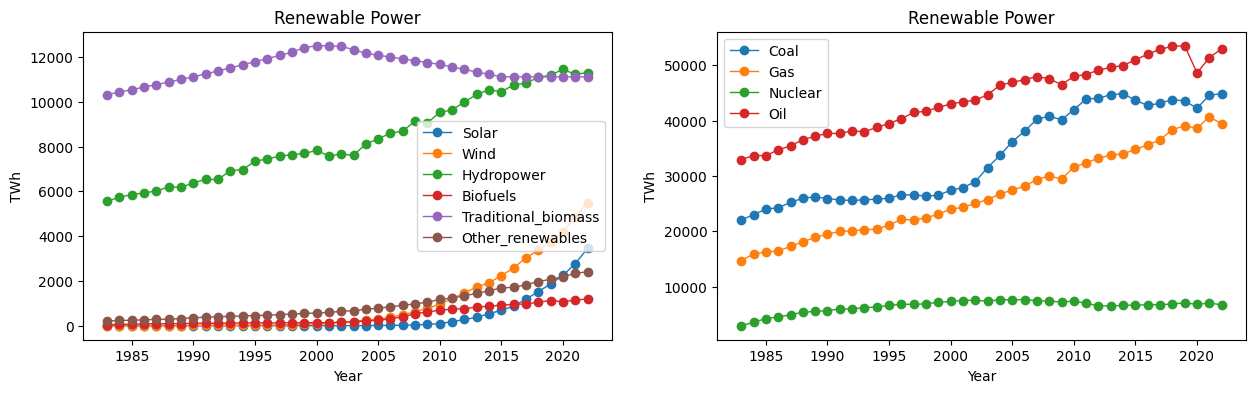

In [46]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
for i in renewable_columns:
    plt.plot(df["Year"], df[i], label=f"{i}", linewidth=1, marker="o")
    plt.xlabel("Year")
    plt.ylabel("TWh")
    plt.title("Renewable Power")
    plt.legend(loc="best")
plt.subplot(1, 2, 2)
for i in non_renewable_columns:
    plt.plot(df["Year"], df[i], label=f"{i}", linewidth=1, marker="o")
    plt.xlabel("Year")
    plt.ylabel("TWh")
    plt.title("Renewable Power")
    plt.legend(loc="best")

In [47]:
df.shape
df.corr()


,Year,Other_renewables,Biofuels,Solar,Wind,Hydropower,Nuclear,Gas,Oil,Coal,Traditional_biomass
Year,1.000000,0.944765,0.921773,0.699733,0.830324,0.988394,0.669024,0.992666,0.983645,0.944904,0.168630
Other_renewables,0.944765,1.000000,0.983517,0.866090,0.962038,0.966322,0.423223,0.970380,0.898344,0.903255,-0.125322
Biofuels,0.921773,0.983517,1.000000,0.809289,0.933556,0.957519,0.353350,0.954420,0.878585,0.927339,-0.212200
Solar,0.699733,0.866090,0.809289,1.000000,0.963701,0.728549,0.162989,0.745447,0.614610,0.603992,-0.289460
Wind,0.830324,0.962038,0.933556,0.963701,1.000000,0.865437,0.242584,0.873755,0.760951,0.772846,-0.281344
Hydropower,0.988394,0.966322,0.957519,0.728549,0.865437,1.000000,0.580543,0.992597,0.963894,0.948193,0.058144
Nuclear,0.669024,0.423223,0.353350,0.162989,0.242584,0.580543,1.000000,0.597910,0.710211,0.531447,0.797767
Gas,0.992666,0.970380,0.954420,0.745447,0.873755,0.992597,0.597910,1.000000,0.971365,0.953870,0.065365
Oil,0.983645,0.898344,0.878585,0.614610,0.760951,0.963894,0.710211,0.971365,1.000000,0.940590,0.225123
Coal,0.944904,0.903255,0.927339,0.603992,0.772846,0.948193,0.531447,0.953870,0.940590,1.000000,-0.008433


In [48]:
df["total"] = df.drop(["Year"], axis=1).sum(axis=1)


In [49]:
df["renewable"] = df[renewable_columns].sum(axis=1)
df["non_renewable"] = df[non_renewable_columns].sum(axis=1)

In [50]:
df["renewable_rate"] = df["renewable"] / df["total"]
df["non_renewable_rate"] = df["non_renewable"] / df["total"]

In [51]:
df.corr()

,Year,Other_renewables,Biofuels,Solar,Wind,Hydropower,Nuclear,Gas,Oil,Coal,Traditional_biomass,total,renewable,non_renewable,renewable_rate,non_renewable_rate
Year,1.000000,0.944765,0.921773,0.699733,0.830324,0.988394,0.669024,0.992666,0.983645,0.944904,0.168630,0.993727,0.955167,0.989423,-0.015931,0.015931
Other_renewables,0.944765,1.000000,0.983517,0.866090,0.962038,0.966322,0.423223,0.970380,0.898344,0.903255,-0.125322,0.951820,0.991692,0.930844,0.240878,-0.240878
Biofuels,0.921773,0.983517,1.000000,0.809289,0.933556,0.957519,0.353350,0.954420,0.878585,0.927339,-0.212200,0.941454,0.959071,0.925495,0.178423,-0.178423
Solar,0.699733,0.866090,0.809289,1.000000,0.963701,0.728549,0.162989,0.745447,0.614610,0.603992,-0.289460,0.700232,0.874681,0.652959,0.630705,-0.630705
Wind,0.830324,0.962038,0.933556,0.963701,1.000000,0.865437,0.242584,0.873755,0.760951,0.772846,-0.281344,0.839149,0.954219,0.803120,0.467958,-0.467958
Hydropower,0.988394,0.966322,0.957519,0.728549,0.865437,1.000000,0.580543,0.992597,0.963894,0.948193,0.058144,0.988827,0.967441,0.980818,0.050238,-0.050238
Nuclear,0.669024,0.423223,0.353350,0.162989,0.242584,0.580543,1.000000,0.597910,0.710211,0.531447,0.797767,0.623891,0.496465,0.643837,-0.389656,0.389656
Gas,0.992666,0.970380,0.954420,0.745447,0.873755,0.992597,0.597910,1.000000,0.971365,0.953870,0.065365,0.995735,0.971168,0.988335,0.031854,-0.031854
Oil,0.983645,0.898344,0.878585,0.614610,0.760951,0.963894,0.710211,0.971365,1.000000,0.940590,0.225123,0.983287,0.907996,0.987176,-0.136910,0.136910
Coal,0.944904,0.903255,0.927339,0.603992,0.772846,0.948193,0.531447,0.953870,0.940590,1.000000,-0.008433,0.970788,0.880619,0.978103,-0.176936,0.176936


In [52]:
df.describe()

,Year,Other_renewables,Biofuels,Solar,Wind,Hydropower,Nuclear,Gas,Oil,Coal,Traditional_biomass,total,renewable,non_renewable,renewable_rate,non_renewable_rate
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,2002.500000,926.614106,424.965961,406.457205,1009.701726,8334.417520,6466.833565,26663.223025,43939.467375,33599.566300,11487.125000,133258.371783,22589.281518,110669.090265,0.169604,0.830396
std,11.690452,661.186841,395.714083,831.787953,1513.651807,1862.932716,1119.167565,7679.473830,6280.778091,8433.673126,595.922779,27461.298886,4993.973795,22759.687053,0.009872,0.009872
min,1983.000000,211.770580,49.019240,0.008871,0.096974,5552.542500,2933.459000,14703.833000,32956.613000,22046.346000,10321.000000,88774.689165,16134.438165,72640.251000,0.152123,0.804584
25%,1992.750000,414.874188,113.515411,1.608126,16.149092,6825.530250,6148.268050,20214.982500,38100.712000,25951.424000,11111.000000,108875.590953,18848.235903,90027.355050,0.161897,0.825707
50%,2002.500000,656.986380,168.664415,5.897006,168.213760,7758.220500,6755.572500,25379.894500,44164.131500,30234.555500,11408.500000,128265.175511,21109.510665,107229.447950,0.170180,0.829820
75%,2012.250000,1361.746000,779.016462,303.204995,1523.960600,10070.336750,7254.843150,33337.730500,48735.655750,42818.821750,11942.000000,158710.115482,25451.514807,133258.600675,0.174293,0.838103
max,2022.000000,2413.807600,1199.206700,3448.237300,5487.600000,11448.027000,7653.721700,40670.660000,53512.844000,44858.120000,12500.000000,178898.675000,34959.667600,143939.007400,0.195416,0.847877
